##  Mapa de toques no meio de campo

### Importar Libs

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.gridspec as gridspec


from mplsoccer import VerticalPitch

from PIL import Image
import urllib
import json
import os

import warnings

warnings.filterwarnings('ignore')

In [9]:
font_path = "D:/pythonProject/Eventos_Brasileirão/src/utils/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("D:/pythonProject/Eventos_Brasileirão/src/utils/stylesheets/soc_base.mplstyle")

In [10]:
whos_23 = pd.read_json('D:/pythonProject/Eventos_Brasileirão/data/raw/Brasileirao_2023_match_data.json')
whos_23 = whos_23.T
whos_23.set_index('matchId', inplace=True)
whos_23

,matchCentreData,matchCentreEventTypeJson,formationIdNameMappings
matchId,,,
1716602,{'playerIdNameDictionary': {'114194': 'Madson'...,"{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'2': '442', '3': '41212', '4': '433', '5': '4..."
1716901,{'playerIdNameDictionary': {'328564': 'Fabrici...,"{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'2': '442', '3': '41212', '4': '433', '5': '4..."
1716849,{'playerIdNameDictionary': {'277351': 'Emmanue...,"{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'2': '442', '3': '41212', '4': '433', '5': '4..."
1716661,{'playerIdNameDictionary': {'125450': 'Wálter ...,"{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'2': '442', '3': '41212', '4': '433', '5': '4..."
1716677,{'playerIdNameDictionary': {'404979': 'Lucas E...,"{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'2': '442', '3': '41212', '4': '433', '5': '4..."
...,...,...,...
1716807,{'playerIdNameDictionary': {'373502': 'Fernand...,"{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'2': '442', '3': '41212', '4': '433', '5': '4..."
1716731,{'playerIdNameDictionary': {'366428': 'Fausto ...,"{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'2': '442', '3': '41212', '4': '433', '5': '4..."
1716646,{'playerIdNameDictionary': {'408110': 'José Ló...,"{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'2': '442', '3': '41212', '4': '433', '5': '4..."


In [11]:
import json

# Escolha no jogo via matchId
match_data = whos_23['matchCentreData'][1716820]

# Especifique o nome do arquivo JSON para exportar
nome_arquivo_json = 'D:/pythonProject/Eventos_Brasileirão/data/processed/fla_flu.json'

# Abra o arquivo em modo de escrita e escreva o dicionário nele no formato JSON
with open(nome_arquivo_json, 'w', encoding='utf-8') as arquivo_json:
    json.dump(match_data, arquivo_json, ensure_ascii=False, indent=4)

# Confirme que o arquivo JSON foi criado com sucesso
print(f'Dados exportados para {nome_arquivo_json}')

Dados exportados para D:/pythonProject/Eventos_Brasileirão/data/processed/fla_flu.json


### Ler e limpar os dados

In [12]:
f = open("D:/pythonProject/Eventos_Brasileirão/data/processed/fla_flu.json", encoding='utf-8')
data = json.load(f)

In [13]:
# Obter os toques de bola para os jogadores que queremos.
players = [
    {
        'name':'Arrascaeta',
        'whoscored_id':'128627', #numero Whoscored
        'country_id':'uru'
    },
    {
        'name':'Pulgar',
        'whoscored_id':'117055',#numero Whoscored
        'country_id':'chi'
    },
    {
        'name':'Gérson',
        'whoscored_id':'242791',#numero Whoscored
        'country_id':'bra'
    },
    {
        'name':'Everton Cebolinha',
        'whoscored_id':'146760',#numero Whoscored
        'country_id':'bra'
    },
    {
        'name':'Pedro',
        'whoscored_id':'318475',#numero Whoscored
        'country_id':'bra'
    },
    {
        'name':'Luiz Araujo',
        'whoscored_id':'317743',#numero Whoscored
        'country_id':'bra'
    },



]


In [14]:
#Verificando
data

{'playerIdNameDictionary': {'303902': 'Agustín Rossi',
  '22152': 'Filipe Luís',
  '398130': 'Matheuzinho',
  '146761': 'Léo Pereira',
  '317681': 'Fabrício Bruno',
  '146760': 'Éverton Cebolinha',
  '317743': 'Luiz Araújo',
  '429548': 'Matheus Cunha',
  '101467': 'Éverton Ribeiro',
  '101675': 'Santos',
  '297581': 'Ayrton Lucas',
  '91779': 'Pablo',
  '318475': 'Pedro',
  '130886': 'Gabriel Barbosa',
  '102464': 'Rodrigo Caio',
  '279575': 'Bruno Henrique',
  '248121': 'Thiago Maia',
  '438188': 'Victor Hugo',
  '242791': 'Gerson',
  '117055': 'Erick Pulgar',
  '145385': 'Guillermo Varela',
  '128627': 'Giorgian de Arrascaeta',
  '429481': 'Wesley',
  '27490': 'Fábio',
  '280413': 'Samuel Xavier',
  '373523': 'Nino',
  '401192': 'Martinelli',
  '131382': 'Marlon Santos',
  '20241': 'Marcelo',
  '397585': 'André',
  '40237': 'Paulo Henrique Ganso',
  '284602': 'Keno',
  '409247': 'John Kennedy',
  '93433': 'Diogo Barbosa',
  '321846': 'Lima',
  '318474': 'Daniel',
  '407469': 'Pedro 

In [15]:
data_list = []
for player in players:
    for d in data['events']:
        try:
            if (d['playerId'] == int(player['whoscored_id'])) & (d['isTouch']):
                data_list.append(d)
        except:
            continue

In [16]:
#Verificando
data_list

[{'id': 2616701847.0,
  'eventId': 17,
  'minute': 1,
  'second': 7,
  'teamId': 1239,
  'playerId': 128627,
  'x': 38.2,
  'y': 9.3,
  'expandedMinute': 1,
  'period': {'value': 1, 'displayName': 'FirstHalf'},
  'type': {'value': 4, 'displayName': 'Foul'},
  'outcomeType': {'value': 1, 'displayName': 'Successful'},
  'qualifiers': [{'type': {'value': 56, 'displayName': 'Zone'},
    'value': 'Back'},
   {'type': {'value': 233, 'displayName': 'OppositeRelatedEvent'},
    'value': '14'},
   {'type': {'value': 13, 'displayName': 'Foul'}},
   {'type': {'value': 286, 'displayName': 'Offensive'}}],
  'satisfiedEventsTypes': [91, 63],
  'isTouch': True},
 {'id': 2616703719.0,
  'eventId': 48,
  'minute': 4,
  'second': 15,
  'teamId': 1239,
  'playerId': 128627,
  'x': 58.0,
  'y': 12.9,
  'expandedMinute': 4,
  'period': {'value': 1, 'displayName': 'FirstHalf'},
  'type': {'value': 1, 'displayName': 'Pass'},
  'outcomeType': {'value': 1, 'displayName': 'Successful'},
  'qualifiers': [{'type'

In [17]:
x_ = [x['x'] for x in data_list]
y_ = [y['y'] for y in data_list]
playerId = [p['playerId'] for p in data_list]

#  Vamos inverter os eixos, estamos usando campo vertical
data = pd.DataFrame({'y':x_,'x':y_,'playerId':playerId})

## Exemplo um jogador

In [18]:
data_test = data[data['playerId'] == 117055].reset_index(drop=True)

In [19]:
colors = [
    '#efe9e6',
    '#e9e1dd',
    '#e3dad3',
    '#dcd3c9',
    '#d4ccc0',
    '#ccc6b7',
    '#c3bfae',
    '#bab9a6',
    '#b0b39e',
    '#a6ad96',
    '#9ba790',
    '#90a18a',
    '#849b84',
    '#789680',
    '#6c907c',
    '#608a79',
    '#538476',
    '#467e74',
    '#387872',
    '#287271',
]
soc_cm = LinearSegmentedColormap.from_list('SOC', colors, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

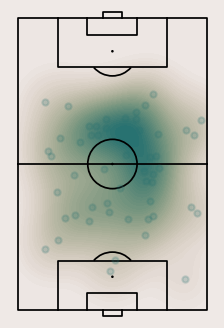

In [20]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='opta',
    goal_type='box',
    linewidth=1.25,
    line_color='black',
)
pitch.draw(ax = ax)

pitch.kdeplot(
    data_test.y, data_test.x, 
    ax=ax, shade=True, 
    levels=100, shade_lowest=True,
    cut=4, zorder=-1, cmap='SOC')

ax.scatter(data_test.x, data_test.y, s=20, alpha=0.2, lw=1.5, color='#287271')

Transformar isso em função

In [21]:
def plot_kdetouches(ax, fig, playerId, countryId, playerName, df=data):
    '''
    Plot kde touches for a specific player.
    '''
    data = df.copy()
    data_player = data[data['playerId'] == int(playerId)].reset_index(drop=True)
    total_touches = data_player.shape[0]
    touches_third = data_player[data_player['y'] >= (100*2)/3].shape[0]/total_touches
    pitch = VerticalPitch(
        pitch_type='opta',
        goal_type='box',
        linewidth=1.25,
        line_color='black',
    )
    pitch.draw(ax=ax)

    pitch.kdeplot(
        data_player.y, data_player.x, 
        ax=ax, shade=True, 
        levels=100, shade_lowest=True,
        cut=4, zorder=-1, cmap='SOC')

    ax.scatter(data_player.x, data_player.y, s=10, alpha=0.2, lw=1.5, color='#287271')
    # -- Transformar a função
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    # -- Pegar as coordenadas e alterar para o campo
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((15,109))
    ax_size = 0.018
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None', anchor='C'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    player_face = Image.open(urllib.request.urlopen(f"{fotmob_url}{countryId}.png"))
    image_ax.imshow(player_face)
    image_ax.axis("off")
    ax_text(
        x=95, y=115,
        s=f'{playerName}\n<Toques {total_touches:.0f} | Último Terço: {touches_third:.0%}>',
        highlight_textprops=[{'size':7, 'weight':'normal'}],
        ax=ax,
        weight='bold',
        size=10,
        font='DM Sans',
        ha='left'
    )
    return ax

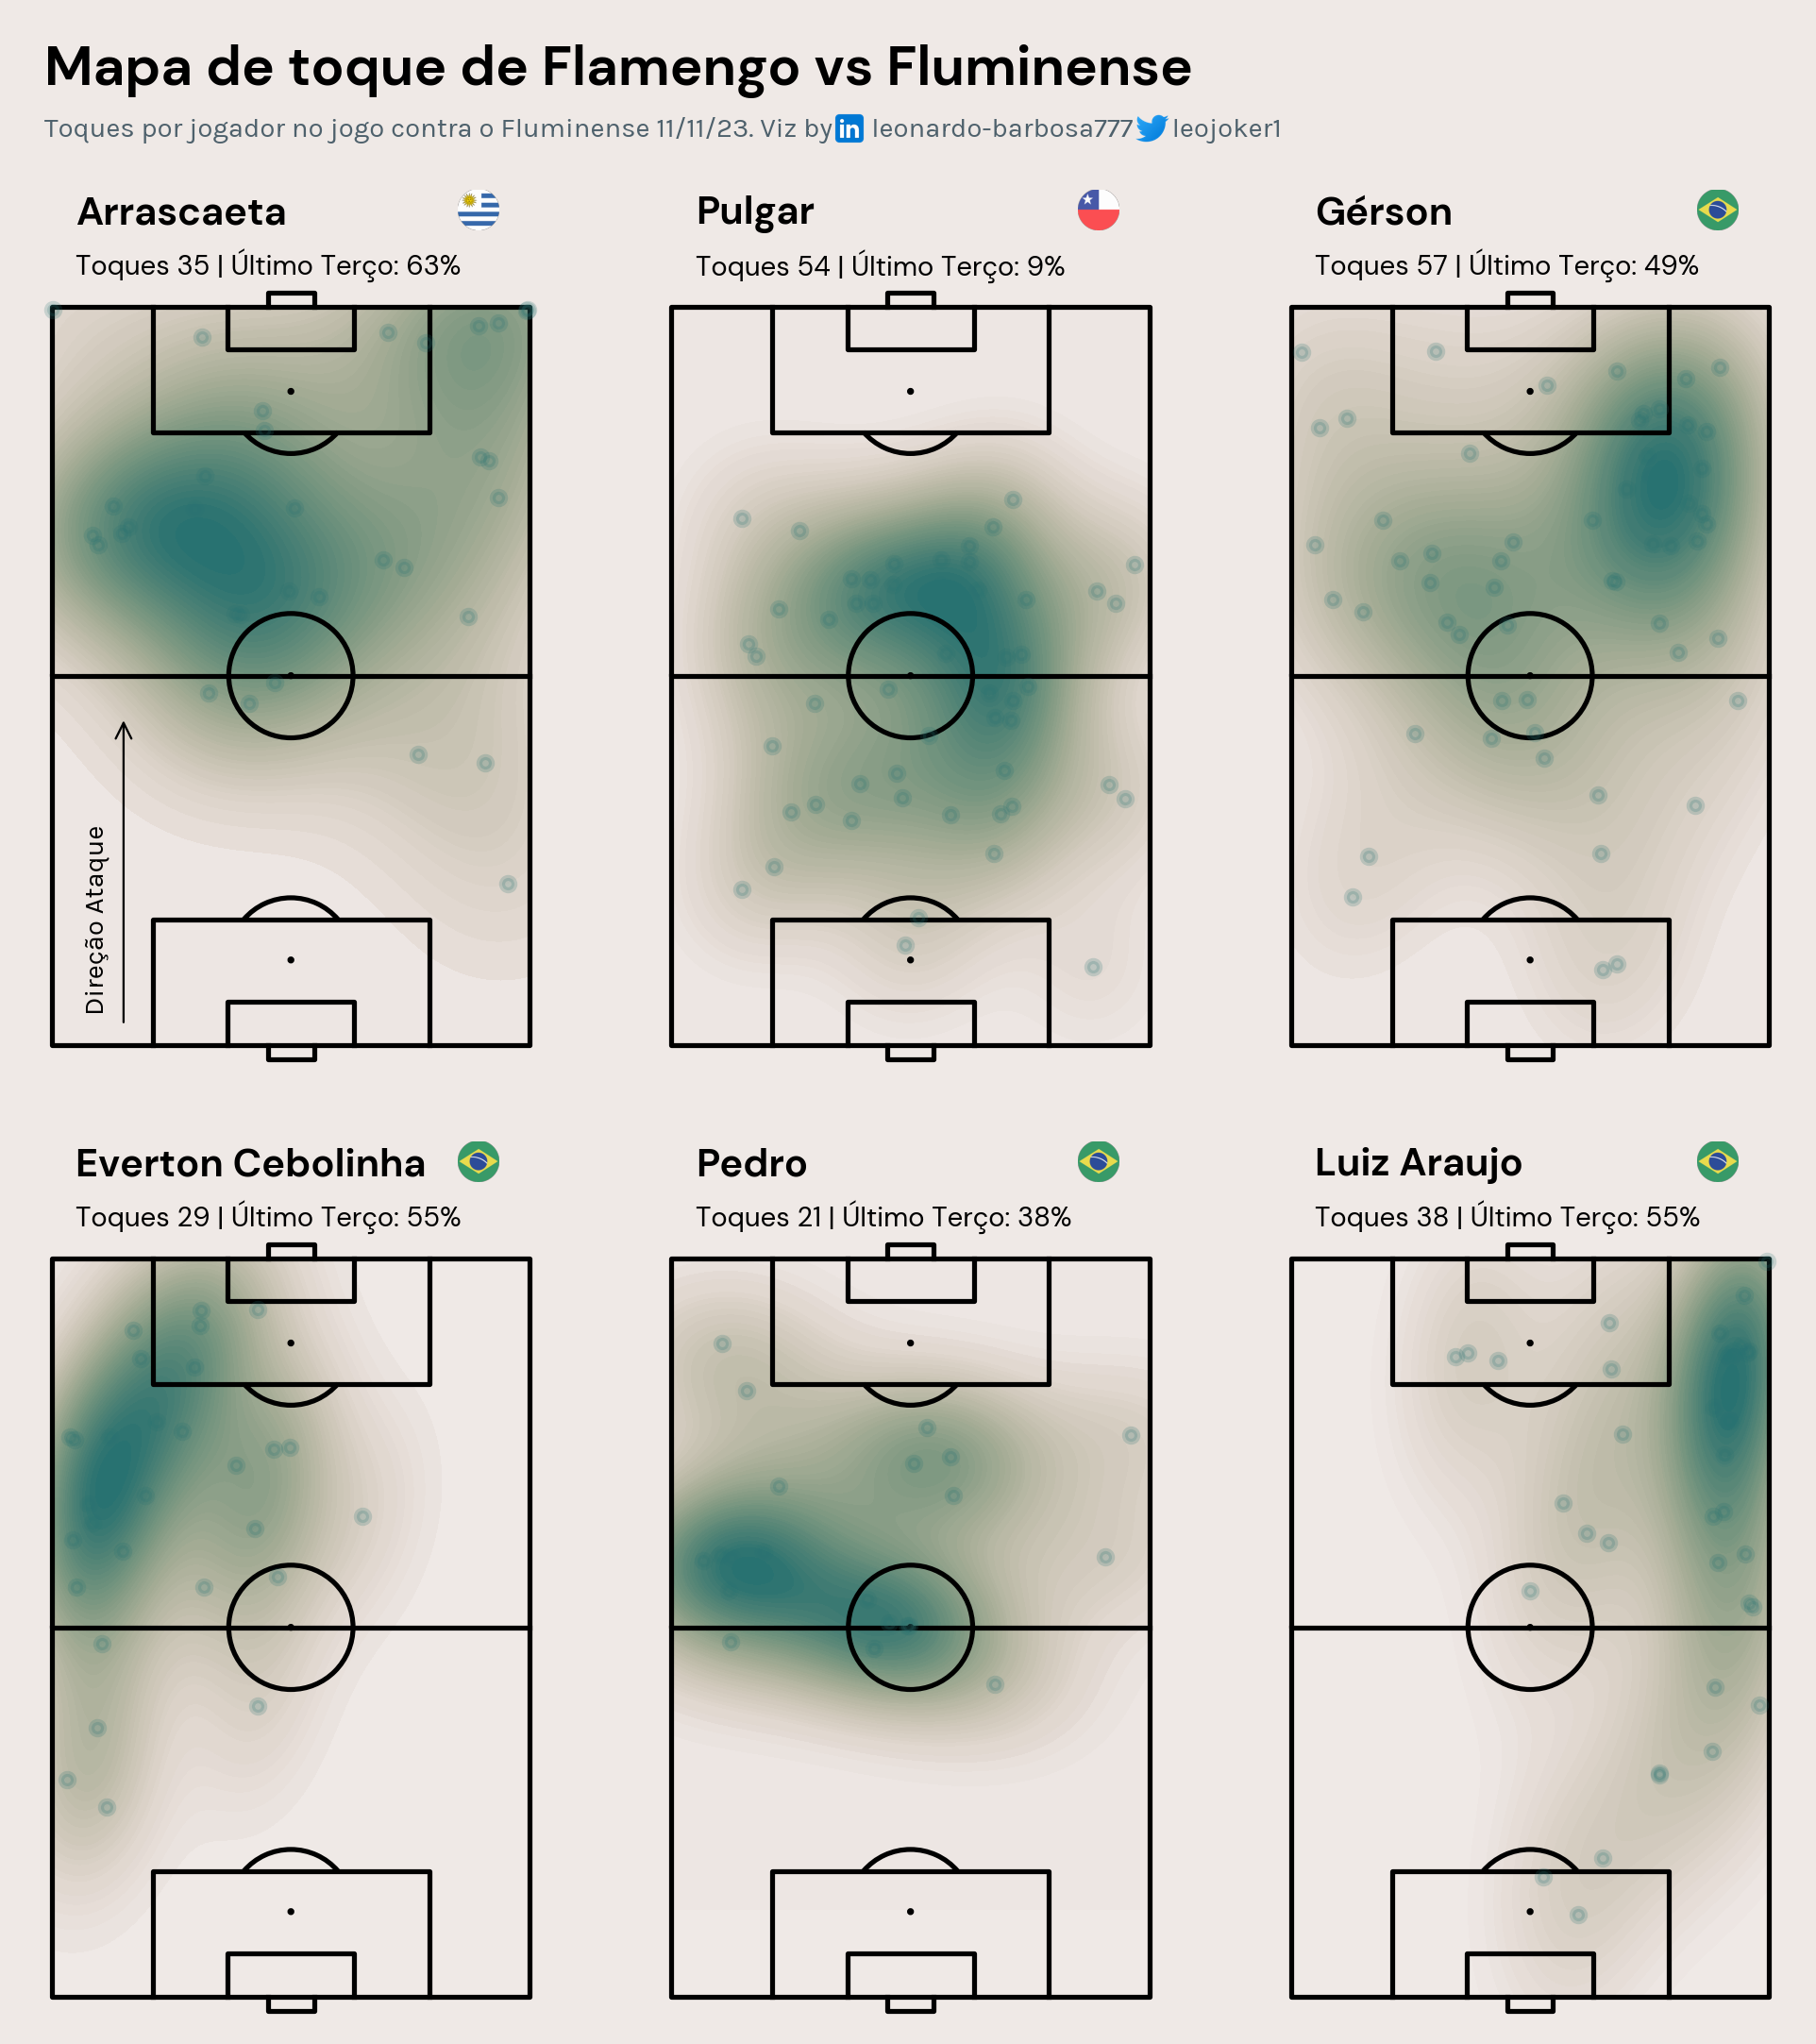

In [51]:
layout_ = '''
    ABC
    DEF
'''

fig = plt.figure(figsize=(8,8), dpi=300)
axs = fig.subplot_mosaic(
    layout_
)

counter = 0
for k, ax in axs.items():
    playerId = players[counter]['whoscored_id']
    countryId = players[counter]['country_id']
    playerName = players[counter]['name']
    plot_kdetouches(ax, fig, playerId, countryId, playerName)
    counter += 1

axs['A'].annotate(
    xy=(93, 5),
    text='Direção Ataque',
    rotation=90,
    size=7
)

axs['A'].annotate(
    xy=(85,2),
    xytext=(85,45),
    text='',
    arrowprops=dict(arrowstyle='<-',linewidth=0.55)
)

fig_text(
    x = 0.13, y = .96, 
    s = "Mapa de toque de Flamengo vs Fluminense",
    va = "bottom", ha = "left",
    fontsize = 14, color = "black", font = "DM Sans", weight = "bold"
)
fig_text(
	x = 0.13, y = .94, 
    s = "Toques por jogador no jogo contra o Fluminense 11/11/23. Viz by      leonardo-barbosa777      leojoker1",
	va = "bottom", ha = "left",
	fontsize = 7, color = "#4E616C", font = "Karla"
)

# Adicione o ícone do Twitter
twitter_icon_path = "D:/pythonProject/Eventos_Brasileirão/src/images/x.png"  # Substitua pelo caminho correto
twitter_icon = Image.open(twitter_icon_path)
n_size = (40,40)
twitter_icon = twitter_icon.resize(n_size)
fig.figimage(twitter_icon, xo=1200, yo=2009, origin='upper')


# Adicione o ícone do linkedin
linkedin_icon_path = "D:/pythonProject/Eventos_Brasileirão/src/images/linkedin.png"  # Substitua pelo caminho correto
linkedin_icon = Image.open(linkedin_icon_path)
n_size = (40,40)
linkedin_icon = linkedin_icon.resize(n_size)
fig.figimage(linkedin_icon, xo=880, yo=2009, origin='upper')




plt.savefig(
	"D:/pythonProject/Eventos_Brasileirão/src/images/fla_flu.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"D:/pythonProject/Eventos_Brasileirão/src/images/fla_flu_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)